<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S I S T E M A  -   D   E  -  I N V E N T A R I O S

La demanda mensual de un cierto producto, sigue la siguiente distribución de probabilidad empírica:

![texto alternativo](https://drive.google.com/uc?id=1i2BtgMyQSJWOi10G1a9UePcG8VItpgzJ)

El tiempo de entrega está distribuido de acuerdo a la siguiente función de probabilidad:

![texto alternativo](https://drive.google.com/uc?id=1VsRSh1p00wfRk-xqdk6YuxcNu0d_Uc6x)

Los factores estacionales para cada uno de los meses del año son como se muestra acontinuación:

![texto alternativo](https://drive.google.com/uc?id=1ei4oObcvT8qq2J77MLS8ar3EIEaWhTfh)

La información con respecto a los costos relevantes es la siguiente:

$$\text{Costo de ordenar = } \$ 100 \text{ /orden}$$ $$\text{Costo de inventario = } \$ 20 \text{ /unidad/año}$$ $$\text{Costo de faltante = } \$ 50 \text{ /unidad}$$

Si el inventario inicial se asume en 150 unidades, ¿ determine la cantidad óptima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$?




S   O   L   U   C    I    Ó    N

In [1]:
#Importamos las librerias necesarias

import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

Aplicamos el método de la transformada inversa para simular los valores de la demanda como nos muestra el ejemplo del libro.

In [2]:
def demanda():                            #Con esta función calcularemos la demanda
  proba=[0,0.01,0.025,0.045,0.065, 0.087,0.11,0.135,0.162,0.19,0.219,0.254,0.299,0.359,0.424,0.494,0.574,0.649,0.719,0.784,0.844, 0.894,0.934,0.964,0.980,0.995,1]
  u=rnd.random()
  for i in range(len(proba)):
      if proba[i-1] <= u <= proba[i]:     # Ubicamos el valor de nuestro número aleatorio en los intervalos
          x=i+34                          #Asignamos el valor de demanda "x"
          break
  return x,u

Para calcular la demanda ajustada, tomaremos en cuenta los factores estacionales para cada uno de los meses del año que nos presenta el ejemplo, los cuales son los que se muestran en factor_est, finalmente tendremos que
$$ \text{Demanda ajustada } = x *(\text{factor_est}) $$

esto para un periodo de 12 meses

In [3]:
def demanda_ajustada(x,mes):              #Con esta función calcularemos la demanda ajustada
  factor_est=[1.2, 1, 0.9, 0.8, 0.8 ,0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
  for j in range(len(factor_est)):
    if mes==j:                            # Posteriormente se creo un for mara ubicar los 12 meses
                                          # Ubicamos el mes
      x=round(x*factor_est[j-1])          # Multiplicamos la demanda por el factor
  return x

Ubicamos el tiempo de entrega como se menciono al primcipio del problema.

In [4]:
def tiemp_entrega(carga_pend,cont_ent):   # Calculamos el tiempo de entrega (y estatus de entrega pendiente)
  carga_pend=True                         #Indica que hay entrega pendiente

  v=rnd.random()
  if 0<= v < 0.3:                         #Asignamos valor a el tiempo de entrega dependiendo su probabilidad
    entrega=1
  elif 0.3 <= v < 0.7:
    entrega=2
  elif 0.7 <= v < 1:
    entrega=3
  cont_ent+=1
  return  entrega,carga_pend,cont_ent


El sitema de inventarios que se analiza es lote constante y tiempo entre pedidos variables. Las variables de desición para este modelo son la cantidad de ordenar $q$ y el nivel de reorden $R$ , las cuales minimizan los costos totales del inventario (costo de ordenar, costo de llevar inventario y costo faltante). En este caso para simular el manual del sistema de inventarios tendremos que  $q=200$ y $R = 100$

In [25]:
# Inicializaos valores iniciales
def inventario(q, R):                        # Definimos nuestra función de inventario
 inv_inicial=150
 inventario_i=[150]                          # Guardamos el inventario inicial en una lista en cual es de 150
 inv_falt=0                                  # Al comienzo no se cuenta con inventario faltante
 carga_pend=False                            # Indicamos que no hay carga pendiente
 tie_entrega=0                               # No hay tiempo de entrega
 cont=-1                                     # Comenzamos en -1 para comenzar a contar desde la siguiente iteracion
 faltante=0
 lista=[]                                     # Lista para imprimir tabla
 cont_ent=0
 for m in range(12):                         # Consideramos un ciclo de 12 meses
   mes=m+1
   dem,val=demanda()                         # Mandamos a llamar nuestra función de demanda
   dem_ajus=demanda_ajustada(dem,mes)        # Calculamos la  demanda ajustada

   inv_final=inv_inicial-dem_ajus            # Calculamos la demanda final
   dem_prom=(inv_inicial+dem_ajus)/2     # Calculamos la demanda promedio mensual

   if inv_final<=R and carga_pend==False:    # Si se pasa el punto de reorden y no hay carga pendiente
     tie_entrega,carga_pend,cont_ent=tiemp_entrega(carga_pend,cont_ent)  # Calculamos el tiempo de entrega

   if carga_pend==True:                        # La entrega aumentara en 1
     cont+=1

   if inv_final<0:                             # Si el inventario final es negativo, se imprime "-"
     faltante=abs(inv_final)
     lista.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{tie_entrega}",f"{np.round(inv_inicial**2/(2*dem_ajus))}"])
     inv_falt+=faltante
   else:
     lista.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{tie_entrega}",f"{np.round(dem_prom)}"])

   inv_inicial=inv_final                       # Inventario final pasa a ser inventario incial en el siguiente mes

   if cont==tie_entrega:                       # Si se cumple tiempo de entrega
     cont=-1
     inv_inicial+=q                            # Ordenamos el inventario
     carga_pend=False                          #Indica que ya no hay carga pendiente
     tie_entrega=0                             # Reinicia tiempo de entrega

   faltante=0                                  # Reinicia inventario faltante
   inventario_i.append(inv_inicial)            # Guarda inventario inicial en una lista

 suma_inv_prom = sum(float(fila[-1]) for fila in lista) # calculamos la demanda promedio mensual
 costo_total = cont_ent * R + suma_inv_prom * 1.67 + inv_falt * 50 # Calculamos el costo total del inventario

 return costo_total, lista, inventario_i, cont_ent, suma_inv_prom, inv_falt


In [26]:
# Asignamos los valores de q y R
costo_total, lista, inventario_i, cont_ent, suma_inv_prom, inv_falt = inventario(200, 100)

In [27]:
# Imprimimos nuestra tabla
headers = ['Mes', 'Inventario inicial' ,'Num_aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(lista, headers=headers, tablefmt="fancy_grid",showindex=False))

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   Num_aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │       0.940099  │        57 │                 68 │ 82                 │          0 │         2 │                           109 │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   82 │       0.306538  │        47 │                 47 │ 35                 │          0 │         2 │                            64 │
├───────┼───────────────────

El inventario inicial queda fijo, el cual es 150, apartir de ahi ira variando dependiendo el número aleatorio que se genere. Simulamos para un año de operación del sistema de inventarios.

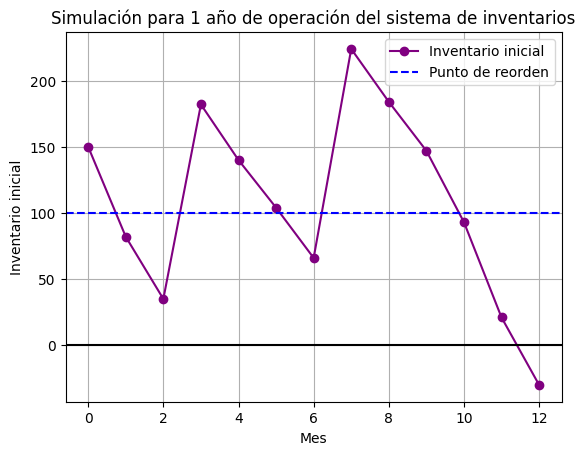

In [64]:
#Imprime gráfica
plt.plot(inventario_i, color="purple",marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sistema de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="blue",linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

Veamos que en este caso especifico , al final del primer mes , el nivel de existencia es menor que el nivel de reorden, por lo cual el primer orden es colocado, de acuerdo con nuestra tabla anterior el tiempo de entrega de este primer orden es de 2 meses, por lo que se tendria un total de 3 ordenes correspondientes al primer mes, sexto mes y decimo mes respectivamente.
Ahora calcularemos los costos totales anuales del sistema de inventario.

In [29]:
costo = [cont_ent * 100, suma_inv_prom * 1.67, inv_falt * 50, costo_total]
print(tabulate([costo], headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total'], tablefmt="fancy_grid", showindex=False))

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│                300 │                         1566.46 │                2400 │       4266.46 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛


Por lo que el costo total anual de nuestro sistema de inventarios para este caso en especifico es de $\$ 4266.46$




O.  P.  T.  I.  M.  I.  Z.  A.  C.  I.  Ó.  N

El método de Hooke-Jeeves es un algoritmo de optimización iterativa utilizado para encontrar el mínimo (o máximo) de una función en un espacio de búsqueda multidimensional. Se clasifica como un método de patrón de búsqueda que combina movimientos exploratorios y de patrón para encontrar una solución óptima. En este caso nuestro objetivo es optimizar el costo del inventario asi como $(q)$ cantidad a ordenar y $(R)$ el reorden.

Primero definimos nuestra función 'parametros' que tomara como entrada los parametros de $q$ y $R$, que nos devolvera el costo total calculado en nuestra función ' inventario', esta sera nuestra función que queremos minimizar.

In [47]:
# Función objetivo para Hooke-Jeeves
def funcion_objetivo(parametros):
    q, R = map(int, parametros)
    costo_total1, _, _, _, _, _ = inventario(q, R)
    return costo_total1

Implementamos el método de Hooke-Jeeves

In [48]:
# Método de Hooke-Jeeves
def hooke_jeeves(func, x0, delta, gamma, epsilon):  # Definimos nuestra función de Hooke_Jeeves
    x = np.array(x0, dtype=float)              # Base inicial: se inicializa con el punto de partida x0,
                                               # que contiene los valores iniciales de q y R
    delta = np.array(delta, dtype=float)       # Se inicializa el paso exploratorio inicial
    while np.any(delta > epsilon):             # Mientras haya pasos mayores que el criterio de parada
        mejorada = False
        for i in range(len(x)):
            for direc in [-1, 1]:
                x_nev = x.copy()
                x_nev[i] += direc * delta[i]
                if func(x_nev) < func(x):       #  Si se encuentra una mejor solución
                    x = x_nev                   #  Actualizamos el punto base
                    mejorada = True
                    break
            if mejorada:
                break
        if not mejorada:                # Si no se encuentra una mejor solución
            delta *= gamma               # Reducimos el paso exploratorio
    return x


El bucle se repite hasta que los pasos exploratorios sean suficientemente pequeños (menores que epsilon), indicando que hemos convergido a una solución óptima.

Nos delvovera y que contendra los valores optimos de $q$ y $R$

In [49]:
# Parámetros iniciales para Hooke-Jeeves
x0 = [200, 100]  # Valores iniciales de q y R
delta = [10.0, 10.0]  # Longitud de paso inicial como floats
gamma = 0.5  # Factor de reducción
epsilon = 0.01  # Criterio de parada

In [50]:
# Ejecutar Hooke-Jeeves
q_opt, R_opt = hooke_jeeves(funcion_objetivo, x0, delta, gamma, epsilon)
print(f'Valores óptimos: q = {q_opt}, R = {R_opt}')

Valores óptimos: q = 134.3359375, R = 94.1015625


In [51]:
# Asignamos los valores de q y R optimos
costo_total_opt, lista_opt, inventario_i_opt, cont_ent_opt, suma_inv_prom_opt, inv_falt_opt = inventario(q_opt, R_opt)

In [52]:
# Imprimimos nuestra tabla generada con q y R ya optimizados
optimo = ['Mes', 'Inventario inicial' ,'Num_aleatorio' ,'Demanda' ,'Demanda ajustada' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
print(tabulate(lista, headers=optimo, tablefmt="fancy_grid",showindex=False))

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│   Mes │   Inventario inicial │   Num_aleatorio │   Demanda │   Demanda ajustada │ Inventario final   │   Faltante │   Entrega │   Inventario mensual promedio │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│     1 │                  150 │       0.940099  │        57 │                 68 │ 82                 │          0 │         2 │                           109 │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│     2 │                   82 │       0.306538  │        47 │                 47 │ 35                 │          0 │         2 │                            64 │
├───────┼───────────────────

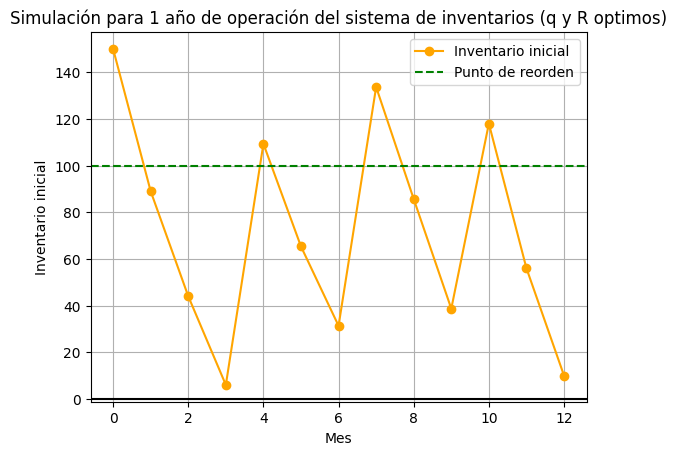

In [62]:
#Imprimimos la gráfica
plt.plot(inventario_i_opt,color="orange", marker='o', label="Inventario inicial")
plt.title('Simulación para 1 año de operación del sistema de inventarios (q y R optimos)')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="green",linestyle='--', label='Punto de reorden')
plt.axhline(0, color='black')
plt.grid(True)
plt.legend()
plt.show()

En este caso podemos ver que tenemos 4 puntos de orden, correspondientes a el primer mes, quiento mes, octavo mes y decimo primero mes, asi nuestro costo optimo para $q$ y $R$ optimos es:

In [58]:
# Calcular el costo total con los valores óptimos
#costo_total_opt, lista_opt, inventario_i_opt, cont_ent_opt, suma_inv_prom_opt, inv_falt_opt = inventario(int(q_opt), int(R_opt))
print(f'Costo total óptimo: {costo_total_opt}')

Costo total óptimo: 3593.245625


Por lo que las variables de decisión son para este caso:
$$ q = 134.33 \approx 134 $$
$$ R = 94.10 \approx 94 $$

lo cual produce un costo promedio total promedio anual de
$$ \$ 3593.24$$

que vemos que efectivamente al optimizar $q$ y $R$, optimizamos nuestro costo total.

Finalmente en la siguiente tabla observamos los castos finales.

In [59]:
# Calcular los costos detallados
costo_ordenar = cont_ent_opt * 100
costo_llevar_inventario = suma_inv_prom_opt * 1.67
costo_faltante = inv_falt_opt * 50
costo_total_detallado = [costo_ordenar, costo_llevar_inventario, costo_faltante, costo_total_opt]

# Imprimir la tabla de costos detallados
costos_optimos = ['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total optimo']
print(tabulate([costo_total_detallado], headers=costos_optimos, tablefmt="fancy_grid", showindex=False))

╒════════════════════╤═════════════════════════════════╤═════════════════════╤══════════════════════╕
│   Costo de ordenar │   Costo de llevar el inventario │   Costo de faltante │   Costo total optimo │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪══════════════════════╡
│                400 │                         1117.23 │             2099.61 │              3593.25 │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧══════════════════════╛
